<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Neural%20Network/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils

np.random.seed(2)

In [9]:
def visualize_data(X, y):
    X0 = X[y == 0, :]
    X1 = X[y == 1, :]
    X2 = X[y == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 7)
    plt.plot(X1[:, 0], X1[:, 1], 'g^', markersize = 7)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 7)

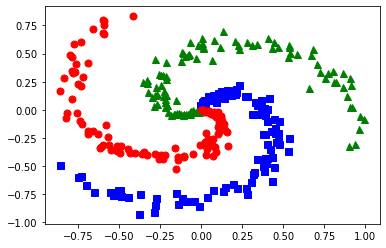

In [10]:
N = 100
number_labels = 3
input_layer_size = 2
X = np.zeros((N * number_labels, input_layer_size))
y = np.zeros(N * number_labels, dtype='uint8')

for j in range(number_labels):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

visualize_data(X, y)

In [11]:
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(2, )))
model.add(Flatten())
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.5), metrics=['accuracy'])
H = model.fit(X, y, epochs = 20)

Epoch 1/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9700
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9767
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9900
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9833
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9833
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9900
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9833
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9867
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9933
Epoch 11/20
10/10 [

In [19]:
def display_result(model, X, y):
    visualize_data(X, y)
    visualize_model(model)
    plt.xlabel('Ox')
    plt.ylabel('Oy')
    plt.show()
    
def visualize_model(model):
    x1 = np.arange(-1.5, 1.5, 0.025)
    x2 = np.arange(-1.5, 1.5, 0.025)
    x1, x2 = np.meshgrid(x1, x2)
    
    xx1 = x1.ravel().reshape(x1.size, 1)
    xx2 = x2.ravel().reshape(x2.size, 1)
    
    X = np.concatenate((xx1, xx2), axis = 1)
    y = model.predict(X)
    y = np.argmax(y, axis = 1)
    y = y.reshape(x1.shape)


    plt.contourf(x1, x2, y, 200, cmap='jet', alpha = .1)

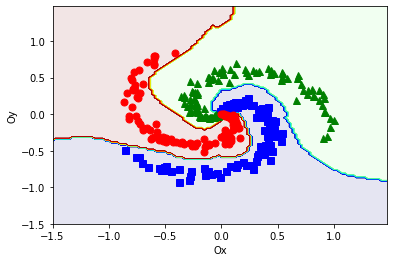

In [20]:
display_result(model, X, y)